In [79]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import json
import nltk
import unicodedata
import re
import string
import joblib as joblib
import pickle as pickle
from unidecode import unidecode

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [80]:
# Load data
data_train = pd.read_csv('../Dataset/train_data.csv')
data_test = pd.read_csv('../Dataset/test_data.csv')

In [81]:
X_train = data_train['article']
y_train = data_train['label']

X_test = data_test['article']
y_test = data_test['label']

In [82]:
# Text preprocessing
def wordopt(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

ps = PorterStemmer()
with open('../Resources/stopwords-tl.json', 'r') as f:
    stopwords = json.load(f)

def preprocess(text):
    # print(f"Input type: {type(text)}")
    text = wordopt(text)
    tokens = nltk.word_tokenize(text)
    stems = [ps.stem(token) for token in tokens]
    filtered = [stem for stem in stems if stem not in stopwords]
    return filtered

In [83]:
labels_array = np.array(y_train)

X_train_real = X_train[labels_array == 0]  # Samples labeled as real news
X_train_fake = X_train[labels_array == 1]

In [84]:
# # Apply preprocess function to X_train
X_train = X_train.apply(preprocess)

# Apply preprocess function to each sample in X_train_real
X_train_real_processed = X_train_real.apply(preprocess)

# Apply preprocess function to each sample in X_train_fake
X_train_fake_processed = [preprocess(sample) for sample in X_train_fake]


In [85]:
# Convert the preprocessed text into a list of strings
X_train_processed = [' '.join(tokens) for tokens in X_train]
X_test_processed = [' '.join(tokens) for tokens in X_test]

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_processed)

# Transform the validation data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_processed)

# Print the shape of the TF-IDF matrices (No of rows, No of columns)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (2103, 27707)
Shape of X_test_tfidf: (902, 27707)


  (0, 26182)	0.22633012228242927
  (0, 14533)	0.26687708411869154
  (0, 17776)	0.16667224520145735
  (0, 20485)	0.3318057092988828
  (0, 4240)	0.15836757291389864
  (0, 13652)	0.3737310681165448
  (0, 8294)	0.24084533914663706
  (0, 21735)	0.2550802082249536
  (0, 17240)	0.29090061862416655
  (0, 26216)	0.30513548770248305
  (0, 17926)	0.23758165633113795
  (0, 22887)	0.297507919091852
  (0, 26148)	0.23758165633113795
  (0, 6957)	0.25360304623702074
  (0, 1454)	0.09166598403262763
  (1, 26116)	0.12435673159601744
  (1, 15023)	0.09082031696924722
  (1, 23380)	0.06695534194093077
  (1, 11163)	0.11962016580233653
  (1, 4014)	0.18463625899894578
  (1, 18763)	0.1015319709326508
  (1, 14958)	0.06949336883610627
  (1, 20127)	0.11962016580233653
  (1, 17595)	0.04837068982607287
  (1, 3365)	0.2620650922680397
  :	:
  (2102, 1574)	0.2911089749192701
  (2102, 5966)	0.09703632497309005
  (2102, 3371)	0.10299711467344641
  (2102, 84)	0.09670371229350846
  (2102, 17920)	0.09754297548717213
  (2102, 

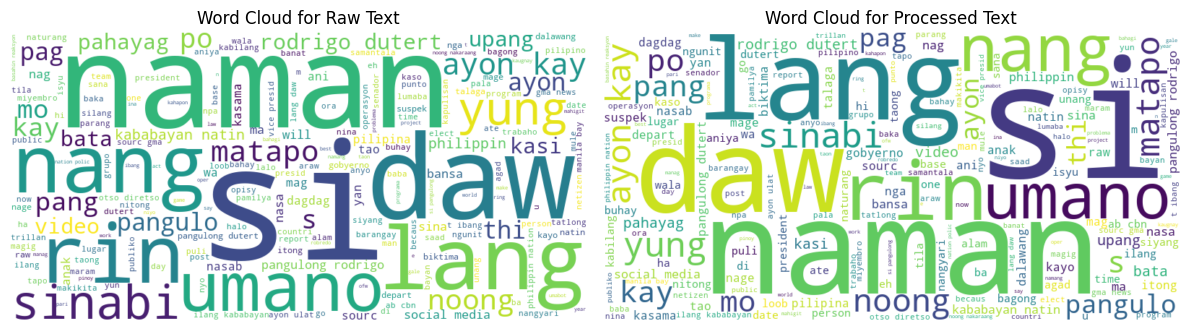

In [86]:



# Convert each element in X_train to a string and join them
raw_text = ' '.join([' '.join(x) for x in X_train])
X_train_processed_str = ' '.join(X_train_processed)


# Initialize WordCloud objects
raw_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
processed_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(X_train_processed_str)

# Plot word clouds
plt.figure(figsize=(12, 6))

# Plot raw text word cloud
plt.subplot(1, 2, 1)
plt.imshow(raw_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Raw Text')
plt.axis('off')

# Plot processed text word cloud
plt.subplot(1, 2, 2)
plt.imshow(processed_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Processed Text')
plt.axis('off')

# Show plots
plt.tight_layout()
plt.show()

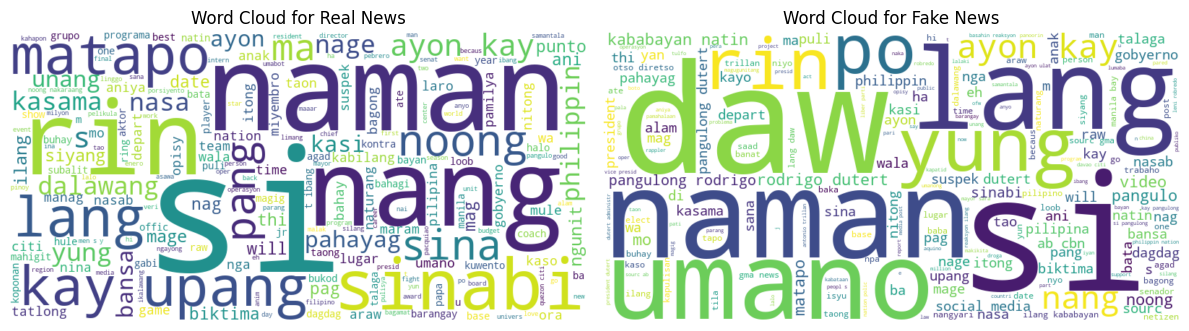

In [96]:
X_train_real_processed_str = ' '.join([' '.join(x) for x in X_train_real_processed])
X_train_fake_processed_str = ' '.join([' '.join(x) for x in X_train_fake_processed])

# Initialize WordCloud objects
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(X_train_real_processed_str)
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(X_train_fake_processed_str)

# Plot word clouds
plt.figure(figsize=(12, 6))

# Plot raw text word cloud
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')

# Plot processed text word cloud
plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

# Show plots
plt.tight_layout()
plt.show()

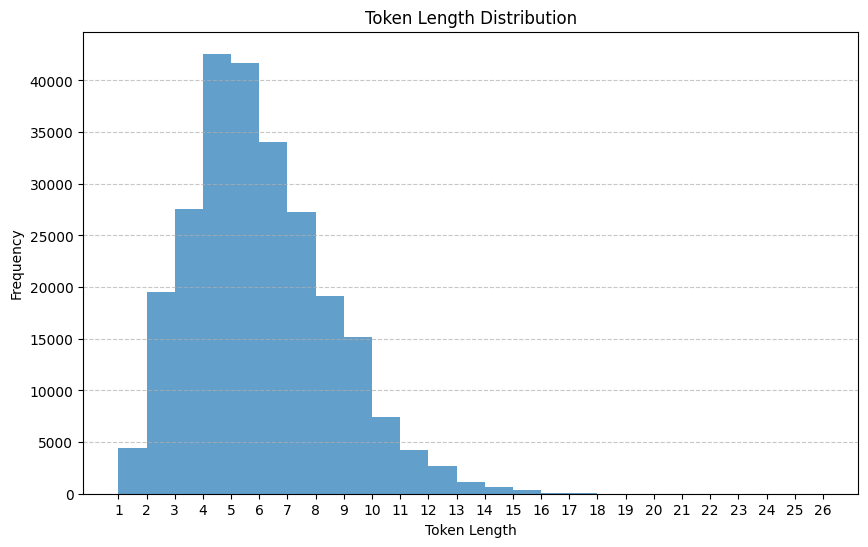

In [99]:
import matplotlib.pyplot as plt
import nltk

# Sample text data
text_data = "This is a sample sentence demonstrating tokenization. It includes common words like cat, dog, and house."

# Tokenization
tokens = nltk.word_tokenize(raw_text)

# Calculate token lengths
token_lengths = [len(token) for token in tokens]

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=range(min(token_lengths), max(token_lengths) + 1), alpha=0.7)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.xticks(range(min(token_lengths), max(token_lengths) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


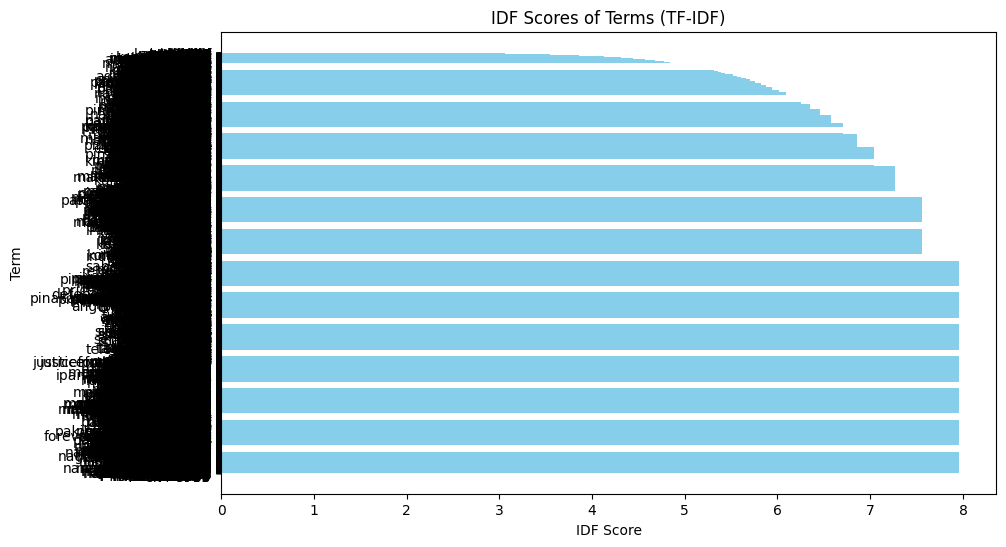

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Sample text data
corpus = [
    "This is a sample document.",
    "Another document for demonstration.",
    "And another sample document for testing."
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the corpus to calculate IDF scores
tfidf_vectorizer.fit(X_train_processed)

# Get the IDF scores for terms
idf_scores = tfidf_vectorizer.idf_

# Get the terms (features)
terms = tfidf_vectorizer.get_feature_names_out()

# Sort terms by IDF scores
sorted_indices = idf_scores.argsort()
sorted_terms = [terms[i] for i in sorted_indices]
sorted_idf_scores = [idf_scores[i] for i in sorted_indices]

# Plot IDF scores of terms
plt.figure(figsize=(10, 6))
plt.barh(sorted_terms, sorted_idf_scores, color='skyblue')
plt.xlabel('IDF Score')
plt.ylabel('Term')
plt.title('IDF Scores of Terms (TF-IDF)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest IDF scores at the top
plt.show()


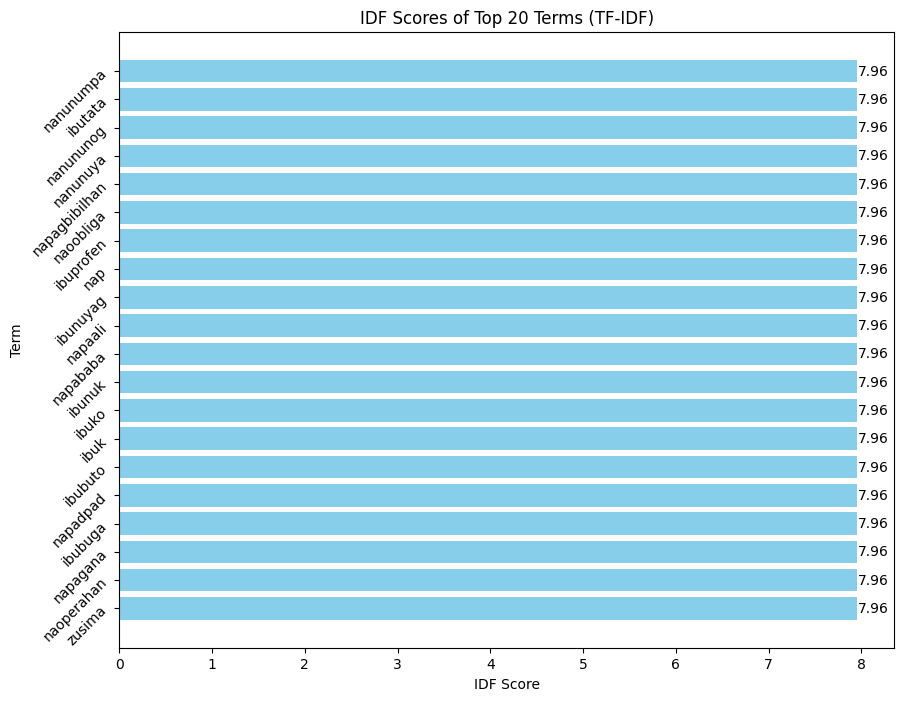

In [112]:
# Plot IDF scores of the top 20 terms
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
top_terms = sorted_terms[-20:]  # Select top 20 terms
top_idf_scores = sorted_idf_scores[-20:]  # Corresponding IDF scores

bars = plt.barh(top_terms, top_idf_scores, color='skyblue')
plt.xlabel('IDF Score')
plt.ylabel('Term')
plt.title('IDF Scores of Top 20 Terms (TF-IDF)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest IDF scores at the top

# Rotate labels on y-axis for better readability
plt.yticks(rotation=45, ha='right')

# Display IDF scores on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.show()


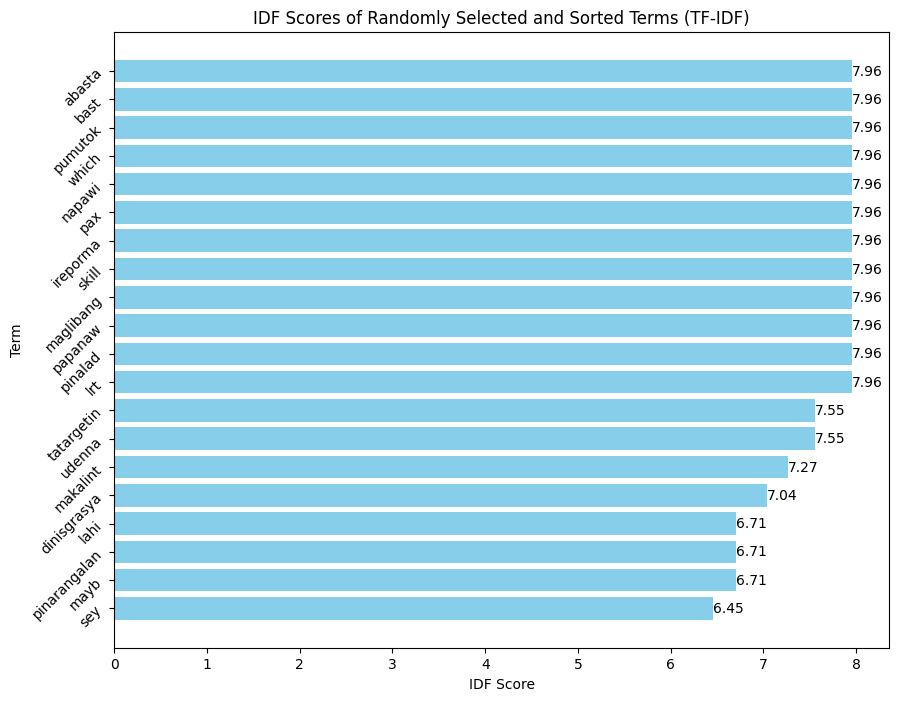

In [116]:
import numpy as np
# Select a random sample of terms
random_terms = random.sample(sorted_terms, 20)

# Convert sorted_terms and random_terms to numpy arrays
sorted_terms_np = np.array(sorted_terms)
random_terms_np = np.array(random_terms)

# Find the indices of the random terms in the sorted_terms_np array
random_indices = np.where(np.isin(sorted_terms_np, random_terms_np))

# Extract the IDF scores for the random terms using the indices
random_idf_scores = idf_scores[random_indices]

# Sort the random terms based on their IDF scores
sorted_indices = np.argsort(random_idf_scores)[::-1]
sorted_random_terms = random_terms_np[sorted_indices]
sorted_random_idf_scores = random_idf_scores[sorted_indices]

# Plot IDF scores of the sorted random terms
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
bars = plt.barh(sorted_random_terms, sorted_random_idf_scores, color='skyblue')
plt.xlabel('IDF Score')
plt.ylabel('Term')
plt.title('IDF Scores of Randomly Selected and Sorted Terms (TF-IDF)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest IDF scores at the top

# Rotate labels on y-axis for better readability
plt.yticks(rotation=45, ha='right')

# Display IDF scores on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.show()
